# Data Analysis for Neonates
The data set contains inpatient hospital claims. Each record is a hospital discharge of a neonate that spent time in a NICU. Using the given data set, this report is generated to illustrate the correlation of the length of stay (LOS) of neonate cases between the fields like Source, Year, APRDRG, Birthweights .
The average length of stay is calculated and compared among different variables. Plots are created based on the data to create visualization in understanding the correlation between different variables.


# Data Preparation

In [1]:
#Importing all the necessary libraries
import os
import pandas as pd
import numpy as np
import patsy as py
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# generating the data from the csv data
df = pd.read_csv('Data for Case Study.csv')
df.head()

,SOURCE,los,BIRTH_WEIGHT,YEAR,APRDRG_VER20
0,MANAGED,54,749,2014,591.0
1,UNMANAGED,12,1999,2014,614.0
2,UNMANAGED,10,2499,2015,626.0
3,UNMANAGED,17,2500,2015,631.0
4,MANAGED,18,1999,2015,612.0


# Data Cleaning

In [3]:

# dropping rows with null values 
df = df.dropna(axis=0)
df.describe()

,los,BIRTH_WEIGHT,YEAR,APRDRG_VER20
count,22029.000000,22029.000000,22029.000000,22029.000000
mean,25.599619,2103.771029,2014.512461,618.290572
std,24.860574,782.952552,0.499856,27.740756
min,7.000000,6.000000,2014.000000,4.000000
25%,10.000000,1565.000000,2014.000000,611.000000
50%,16.000000,2020.000000,2015.000000,621.000000
75%,31.000000,2500.000000,2015.000000,631.000000
max,200.000000,9999.000000,2015.000000,952.000000


# Data is grouped by Source,Year and APRDRG and average of length of stay is calculated

In [4]:
groupedbyAPRDRG_VER20_df=df.groupby(["SOURCE","YEAR","APRDRG_VER20"]).agg({"los": ['mean']})
groupedbyAPRDRG_VER20_df.columns = ['Total Average Los']
groupedbyAPRDRG_VER20_df.to_excel(r'C:\Users\mghan\Desktop\Neonates\averagelos.xlsx', header=True)
groupedbyAPRDRG_VER20_df

Total Average Los
SOURCE    YEAR APRDRG_VER20                   
MANAGED   2014 588.0                 88.620690
               591.0                 79.500000
               593.0                 62.962963
               602.0                 60.666667
               603.0                 27.833333
               607.0                 40.224138
               608.0                 32.100000
               609.0                 40.761905
               611.0                 26.452381
               612.0                 24.985915
               613.0                 18.705882
               614.0                 17.193548
               621.0                 15.484848
               622.0                 13.560000
               623.0                 11.750000
               625.0                 12.871795
               626.0                 12.307692
               630.0                 10.000000
               631.0                 34.125000
               633.0                 12.875000
               634.0                 11.524272
               636.0                 10.730769
               639.0                  8.800000
               640.0                  8.181818
          2015 588.0                 85.000000
               591.0                 94.944444
               593.0                 69.152174
               602.0                 49.840909
               603.0                 36.250000
               607.0                 41.970588
...                                        ...
UNMANAGED 2014 631.0                 14.000000
               633.0                 13.406250
               634.0                 11.109589
               636.0                 10.428571
               639.0                 11.217391
               640.0                 10.470588
          2015 588.0                109.200000
               591.0                 80.000000
               593.0                 68.153846
               602.0                 45.612903
               603.0                 28.250000
               607.0                 34.380952
               608.0                 21.363636
               609.0                 34.909091
               611.0                 20.566038
               612.0                 20.571429
               613.0                 16.611111
               614.0                 16.403226
               621.0                 13.815789
               622.0                 13.037037
               623.0                 10.923077
               625.0                 13.019231
               626.0                 10.541667
               630.0                 18.000000
               631.0                 20.750000
               633.0                 13.166667
               634.0                 10.791667
               636.0                  9.200000
               639.0                  9.800000
               640.0                 10.294118

[186 rows x 1 columns]

# The plot for the break down of the average length of stay vs Source, Year and APRDRG


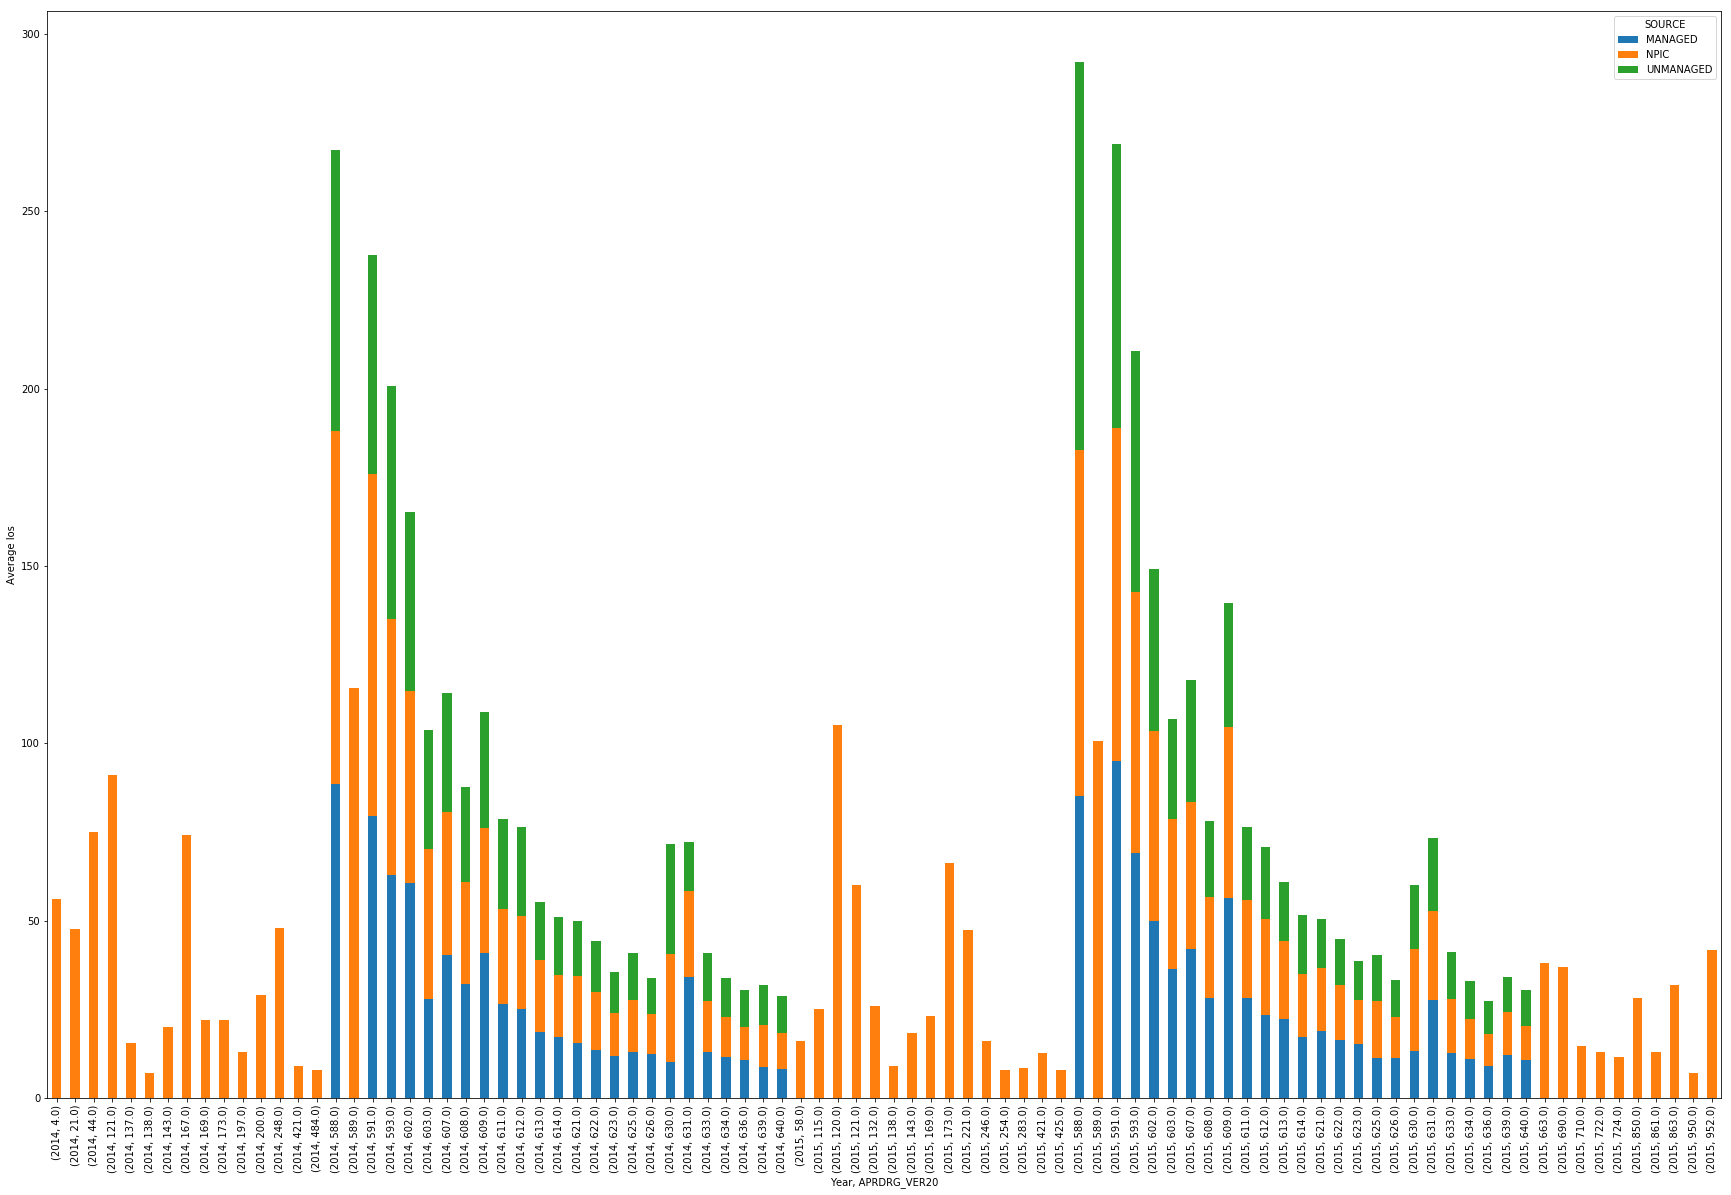

In [5]:
# Organinsing the dataset to get the plot
newgrouped_df = df.groupby(["YEAR","APRDRG_VER20","SOURCE"]).agg({"los": ['mean']})
newgrouped_df.columns = ['Total Average Los']
newgrouped_df['Total Average Los'].unstack().plot(kind='bar',stacked= True,figsize=(30,20))
plt.xlabel("Year, APRDRG_VER20")
plt.ylabel("Average los")
plt.savefig('Breakdown plot 1.png')

In [6]:
# If we disregard the APRDRG to check the relation between Sources and average length of stay with time
groupedbysourceyear_df=df.groupby(["SOURCE","YEAR"]).agg({"los": ['mean']})
groupedbysourceyear_df.columns = ['Total Average Los']
groupedbysourceyear_df.to_excel(r'C:\Users\mghan\Desktop\Neonates\averagelosbysourceyear.xlsx', header=True)
groupedbysourceyear_df

Total Average Los
SOURCE    YEAR                   
MANAGED   2014          28.361927
          2015          27.109426
NPIC      2014          26.058810
          2015          25.369998
UNMANAGED 2014          22.309843
          2015          21.823611

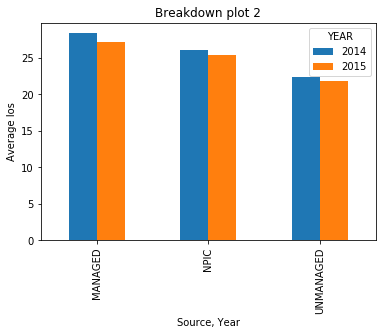

In [7]:
groupedbysourceyear_df['Total Average Los'].unstack().plot(kind="bar",legend=['SOURCE'])
plt.title("Breakdown plot 2")
plt.xlabel("Source, Year")
plt.ylabel("Average los")
plt.savefig('Breakdown plot 2.png')

# Conclusion
TThe Breakdown plot 1 shows that there is a trend in the correlation of the APRDRG vs average length of stay for each Sources. The relative distribution of average length of stay among all  APRDRG is  similar for two year.
The Breakdown plot 2 shows managed cases have highest average length of stay for both the year, then NPIC sources have the higher average length of stay than unmanaged cases for both the year. The decrease of the average LOS from managed to NPIC to unmanaged appear to be consistent between 2014 and 2015 based on the plot. 


# Analysis of the distribution of managed cases by APR DRG

In [8]:
# Filtering  Managed cases
df_managedcases =df[ df["SOURCE"]=="MANAGED"]
df_managedcases.sort_values(by=['los'], ascending=True)
df_managedcases

,SOURCE,los,BIRTH_WEIGHT,YEAR,APRDRG_VER20
0,MANAGED,54,749,2014,591.0
4,MANAGED,18,1999,2015,612.0
6,MANAGED,9,1999,2014,612.0
7,MANAGED,36,1249,2014,602.0
8,MANAGED,7,2500,2014,633.0
9,MANAGED,21,2499,2015,621.0
10,MANAGED,7,1999,2015,614.0
11,MANAGED,8,2500,2015,639.0
13,MANAGED,8,2500,2015,633.0
14,MANAGED,79,999,2014,593.0


In [9]:
#Calculating the total average length of stay by APRDRG for  managed cases
groupedmanaged_df=df.groupby([ "APRDRG_VER20"]).agg({"los": ['mean']})
groupedmanaged_df.columns = ['Average Los']
groupedmanaged_df.to_excel(r'C:\Users\mghan\Desktop\Neonates\averagelosbyAPRDRGmanaged.xlsx', header=True)
groupedmanaged_df=groupedmanaged_df.reset_index()
groupedmanaged_df

,APRDRG_VER20,Average Los
0,4.0,56.000000
1,21.0,47.500000
2,44.0,75.000000
3,58.0,16.000000
4,115.0,25.000000
5,120.0,105.000000
6,121.0,70.333333
7,132.0,26.000000
8,137.0,15.500000
9,138.0,8.000000


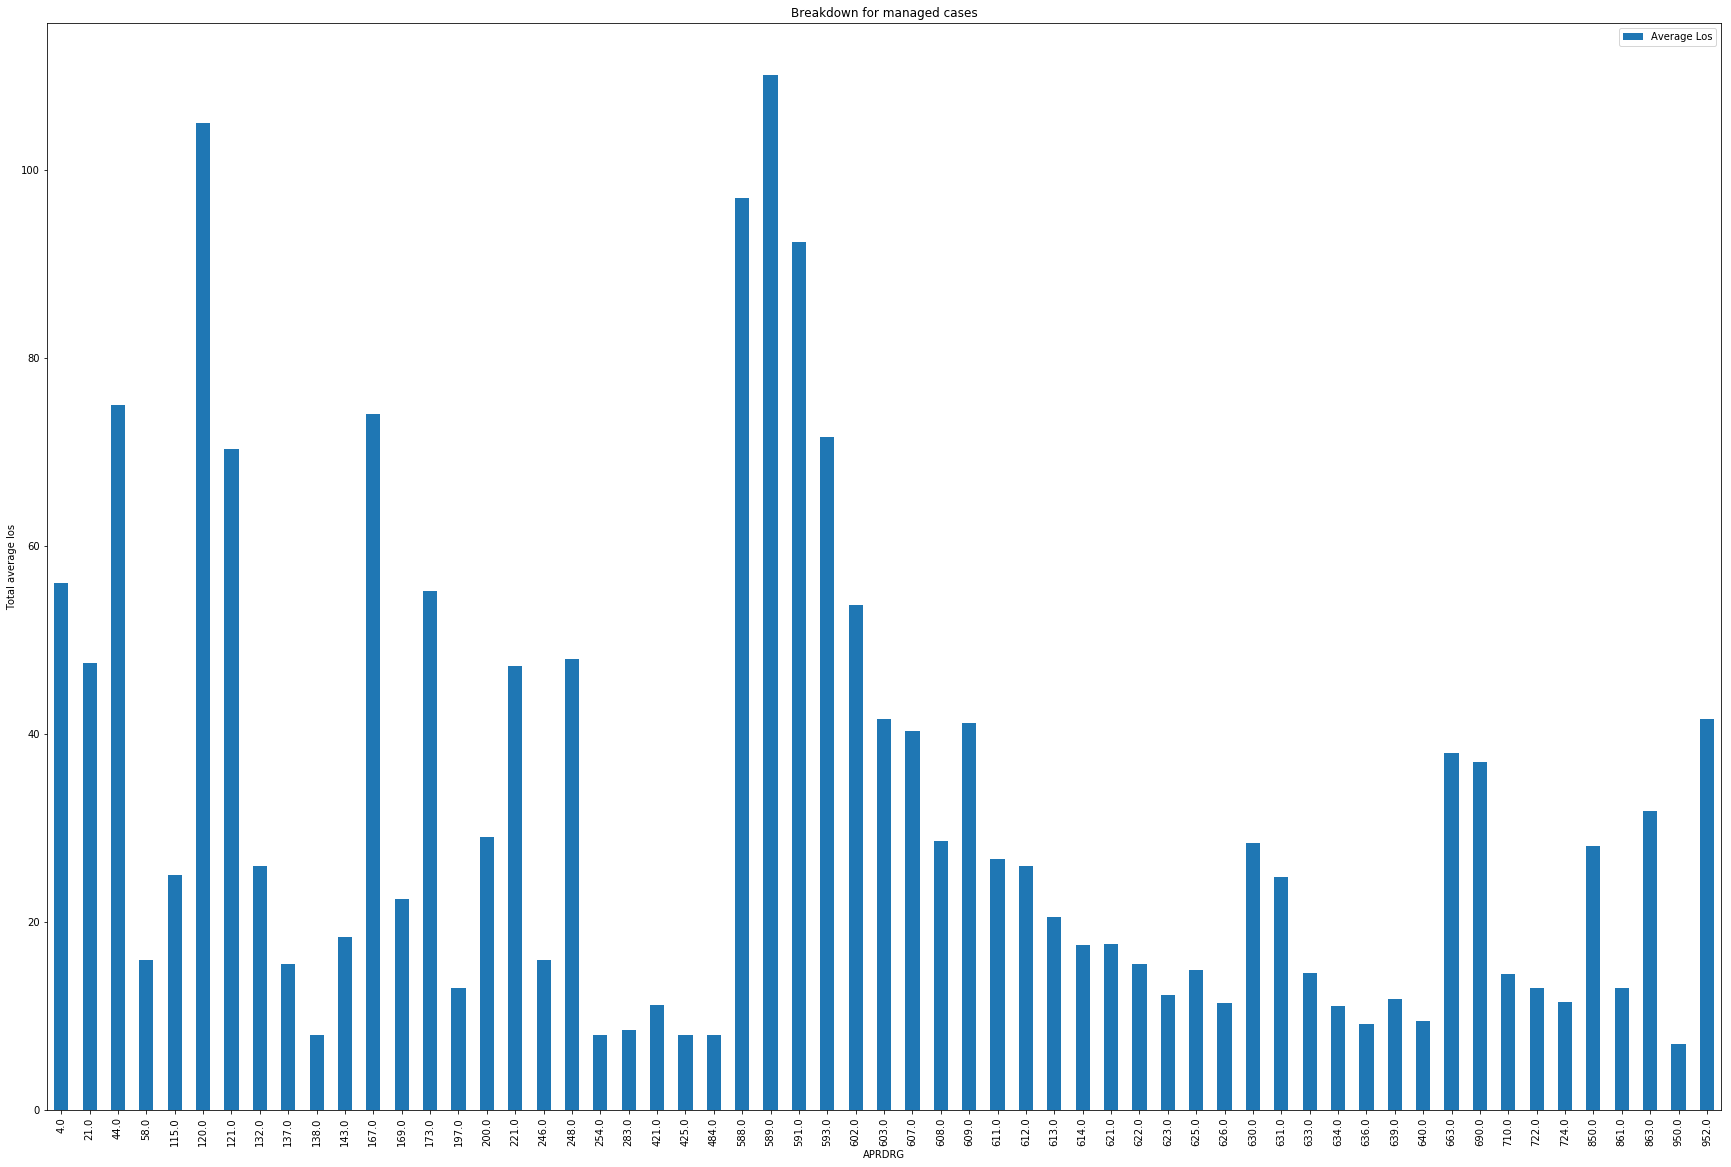

In [10]:
# Plotting the graph for total average length of stay vs APRDRG for managed cases

groupedmanaged_df.plot(x='APRDRG_VER20',y='Average Los', kind="bar", figsize=(30,20))
plt.title("Breakdown for managed cases")
plt.xlabel("APRDRG")
plt.ylabel("Total average los")
plt.savefig('Breakdown for managed cases.png')

# Conclusion
The plot shows, for different APRDRG, the total average length of stay is different in managed cases.
It also reveals that code 589 which corresponds to NEONATE with birthweight <500 Gram  has highest total average length of stay and code 950  which corresponds to EXTENSIVE PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS has lowest total average length of stay.


# Exhibit 2 - A table that summarizes the data by the following birthweights. Results should be shown separately by source but the two years can be combined.

In [11]:
#Preparing the data for creating birth weight range field
df['Birth Weight Range'] = pd.cut(df['BIRTH_WEIGHT'], [0, 750, 1000,1249,1499,1999,2499, np.inf], 
                              labels=['< 750 ', '750 - 1000', '1000 - 1249','1250 - 1499','1500 - 1999','2000 - 2499','> 2500'])

df.sort_values(by=['BIRTH_WEIGHT'], ascending=True)

,SOURCE,los,BIRTH_WEIGHT,YEAR,APRDRG_VER20,Birth Weight Range
21858,NPIC,98,6,2015,588.0,< 750
15462,NPIC,7,8,2015,626.0,< 750
11993,NPIC,66,85,2014,593.0,< 750
18590,NPIC,11,170,2015,614.0,< 750
12318,NPIC,134,250,2014,588.0,< 750
21798,NPIC,132,250,2015,589.0,< 750
12185,NPIC,104,250,2014,589.0,< 750
21795,NPIC,103,310,2015,589.0,< 750
12198,NPIC,174,369,2014,589.0,< 750
21824,NPIC,124,379,2015,588.0,< 750


In [12]:
#To create a table to calculate Total average Length of stay by birth weight range and APRDRG .
grouped_birthweightrange=df.groupby(["Birth Weight Range", "APRDRG_VER20"]).agg({"los": ['mean']})
grouped_birthweightrange.columns = ['Total mean Los']
grouped_birthweightrange.to_excel(r'C:\Users\mghan\Desktop\Neonates\averagelosbyBirthWeightRangesAPRDRG.xlsx', header=True)
grouped_birthweightrange

Total mean Los
Birth Weight Range APRDRG_VER20                
< 750              173.0             105.000000
                   588.0             118.650685
                   589.0             110.090909
                   591.0              92.360277
                   593.0              82.000000
                   614.0              11.000000
                   626.0               7.000000
                   863.0              77.666667
750 - 1000         121.0              88.000000
                   173.0              70.000000
                   588.0              98.390728
                   593.0              71.537313
                   602.0              58.230769
                   603.0              67.500000
                   663.0              38.000000
                   850.0             115.000000
                   863.0              39.750000
                   952.0              68.000000
1000 - 1249        21.0               47.500000
                   143.0              43.000000
                   197.0              13.000000
                   221.0              90.500000
                   588.0              78.674699
                   602.0              53.613248
                   603.0              41.329446
                   863.0              42.166667
                   952.0              48.000000
1250 - 1499        44.0               75.000000
                   121.0              35.000000
                   132.0              26.000000
...                                         ...
2000 - 2499        710.0              13.000000
                   850.0              21.000000
                   863.0              19.333333
                   952.0              16.000000
> 2500             4.0                56.000000
                   137.0              15.500000
                   138.0               7.000000
                   143.0              13.666667
                   173.0              22.000000
                   200.0               7.000000
                   221.0              14.500000
                   246.0              16.000000
                   254.0               8.000000
                   283.0              10.000000
                   421.0              12.000000
                   425.0               8.000000
                   484.0               8.000000
                   602.0              45.000000
                   612.0              37.000000
                   630.0              28.393617
                   631.0              24.825858
                   633.0              14.584736
                   634.0              11.106244
                   636.0               9.209596
                   639.0              11.802116
                   640.0               9.507891
                   690.0              37.000000
                   722.0              13.000000
                   724.0              11.500000
                   861.0              13.000000

[95 rows x 1 columns]

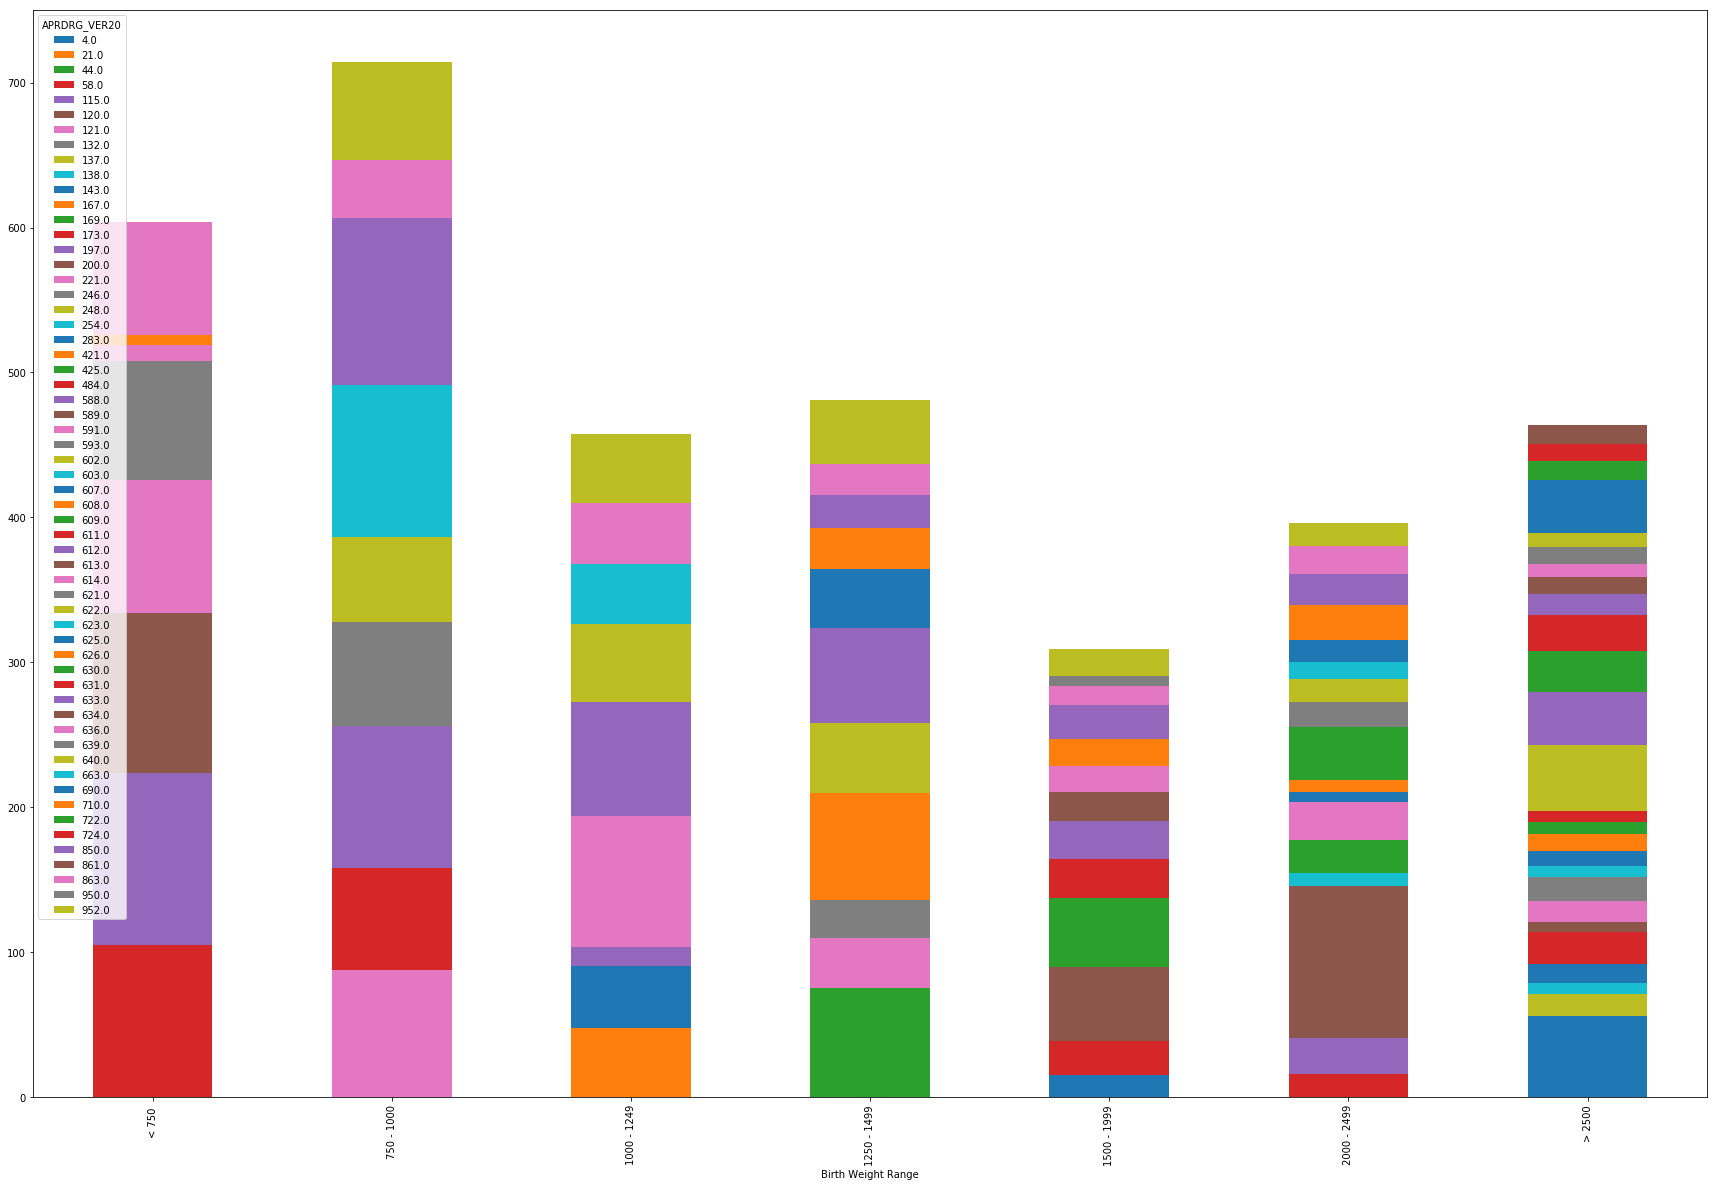

In [13]:
#Plot to show the relation between Birth Weight range , APRDRG Vs Total mean length of stay
grouped_birthweightrange['Total mean Los'].unstack().plot(kind='bar', stacked=True,figsize=(30,20))
plt.savefig('Breakdown for Birth Weight Ranges and APRDRG.png')

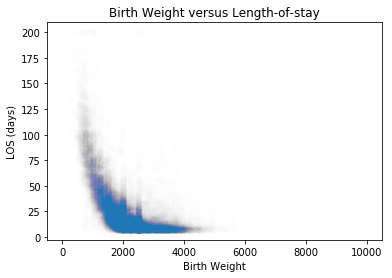

In [14]:
#Another plot show if there is any relation between Birth weight and Total mean length of stay
plt.scatter(df['BIRTH_WEIGHT'], df['los'], alpha=0.005)
plt.ylabel('LOS (days)')
plt.xlabel('Birth Weight')
plt.title('Birth Weight versus Length-of-stay')
plt.savefig('Scatter Plot Birth Weight vs los.png')

# Conclusion
From the above plots, it is observed that bright weight range <750 and 750-1000 have greater average length of stay than other higher birth weight range.
The scatter plot 'Birth Weight versus Length-of-stay' also suggests that birthweight and length of stay are inversely proportion. Hence lower birth weights should have longer length of stays.


# Correlation Heat Maps

                   los  BIRTH_WEIGHT      YEAR  APRDRG_VER20  Source Code
los           1.000000     -0.617598 -0.012933     -0.354611    -0.005723
BIRTH_WEIGHT -0.617598      1.000000  0.027928      0.410532     0.019363
YEAR         -0.012933      0.027928  1.000000      0.038421     0.012346
APRDRG_VER20 -0.354611      0.410532  0.038421      1.000000     0.014667
Source Code  -0.005723      0.019363  0.012346      0.014667     1.000000


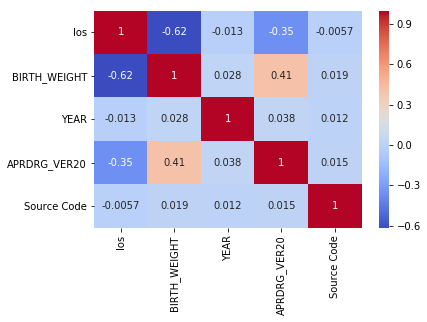

In [15]:
#Creating a field to identify the Soucrce in the form of code Managed as 1, Unmanaged as 2 and NPIC as 3
def source(x):
    if "MANAGED" in x and "UNMANAGED" not in x:
        return 1
    elif "UNMANAGED" in x:
        return 2
    elif "NPIC" in x:
        return 3
    else: return 4
df["Source Code"] = df["SOURCE"].apply(source)    
                                       
                                         
# calculate the correlation matrix

corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        
            cmap='coolwarm',
            annot=True)
print(corr)
plt.savefig('Correlation Heat map.png')

# Analysis from Correlation Heatmap
Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. A value closer to zero mean there is no linear trend between the two variables. The values closer to 1 mean the relationship is stronger and it is directly proportional. A correlation closer to -1 is similar, but inversely proportional. The diagonals are all 1 and dark red because those squares are correlating each variable to itself. For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

Here the above correlation matrix indicates some of the relation among variables.
1. The variables Birthweight and LOS forms a square with correlation value as -0.62, which is significant as it is in range of -1 to +1. The (-) indicates that they are inversely proportional to each other. This correlation is also supported by the scatter plot of Birth_weight vs los (Figure 5)
2. There is insignificant correlation between Source Values (Managed-1, Unmanaged-2 and NPIC -3) with any other variables.

